In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./preprocess_sbi.csv')
df.head()

,age,wcc,prevAB,sbi,pct,crp
0,0.79,3.8,0,3,0.090000,17.700000
1,1.91,25.3,1,3,4.400000,150.400000
2,0.07,20.0,0,3,0.548136,47.359279
3,0.95,6.0,0,3,0.310000,4.900000
4,0.11,15.6,0,3,0.936872,31.394860


In [3]:
sample_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(sample_df.index)

In [4]:
sample_df

,age,wcc,prevAB,sbi,pct,crp
1393,1.19,16.5,0,1,2.000000,71.200000
668,1.49,9.4,0,1,0.735932,39.862150
2000,3.70,19.9,0,1,0.120000,33.500000
808,1.41,5.9,0,1,4.573139,9.160000
1901,2.61,11.8,0,1,0.070000,22.500000
...,...,...,...,...,...,...
848,4.74,11.6,1,1,0.370000,34.200000
2044,1.26,3.7,0,1,2.040000,41.700000
2301,3.90,12.2,0,1,2.150000,48.882555
753,1.30,29.2,1,1,2.276695,37.110000


In [5]:
test_df

,age,wcc,prevAB,sbi,pct,crp
1,1.91,25.3,1,3,4.400000,150.400000
4,0.11,15.6,0,3,0.936872,31.394860
11,0.63,22.8,0,3,1.450000,260.300000
16,1.54,15.7,1,3,1.580699,89.657349
19,0.35,7.7,1,3,1.584856,145.039406
...,...,...,...,...,...,...
2324,0.25,24.7,0,1,10.291240,24.100000
2328,1.92,15.9,1,1,0.060000,11.300000
2329,0.48,4.8,1,1,4.399836,18.878015
2332,1.70,16.0,0,1,3.790000,27.600000


In [6]:
sample_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [7]:
sample_df.head()

,index,age,wcc,prevAB,sbi,pct,crp
0,1393,1.19,16.5,0,1,2.000000,71.20000
1,668,1.49,9.4,0,1,0.735932,39.86215
2,2000,3.70,19.9,0,1,0.120000,33.50000
3,808,1.41,5.9,0,1,4.573139,9.16000
4,1901,2.61,11.8,0,1,0.070000,22.50000


In [8]:
test_df.head()

,index,age,wcc,prevAB,sbi,pct,crp
0,1,1.91,25.3,1,3,4.400000,150.400000
1,4,0.11,15.6,0,3,0.936872,31.394860
2,11,0.63,22.8,0,3,1.450000,260.300000
3,16,1.54,15.7,1,3,1.580699,89.657349
4,19,0.35,7.7,1,3,1.584856,145.039406


In [9]:
sample_df.drop('index', axis=1, inplace=True)
test_df.drop('index', axis=1, inplace=True)

In [10]:
sample_df.head(1)

,age,wcc,prevAB,sbi,pct,crp
0,1.19,16.5,0,1,2.0,71.2


In [11]:
test_df.head(1)

,age,wcc,prevAB,sbi,pct,crp
0,1.91,25.3,1,3,4.4,150.4


# Check distribution

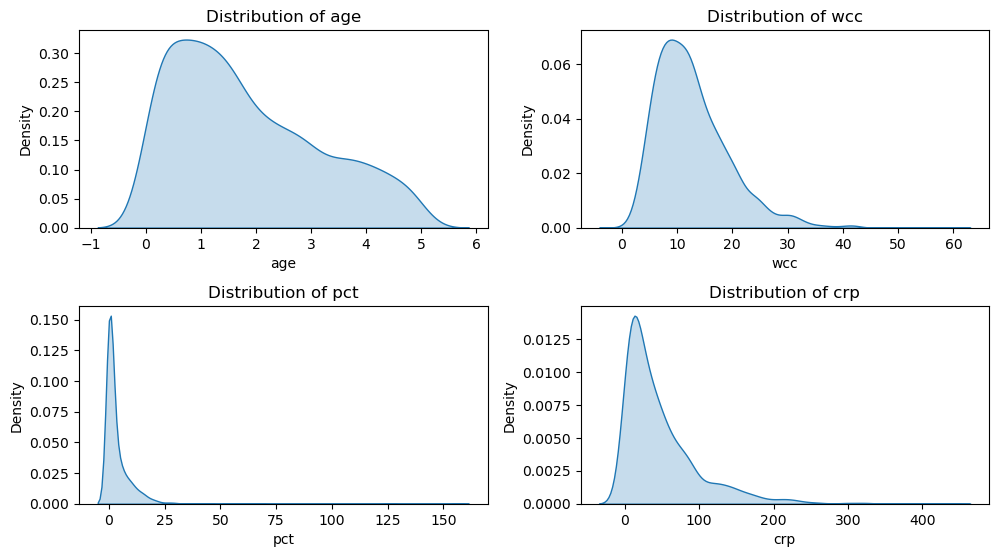

In [28]:
plt.figure(figsize=(10, 8))
col = ['age', 'wcc', 'pct', 'crp']
for i, feature in enumerate(col):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(sample_df[feature], fill=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

## Check Outliers

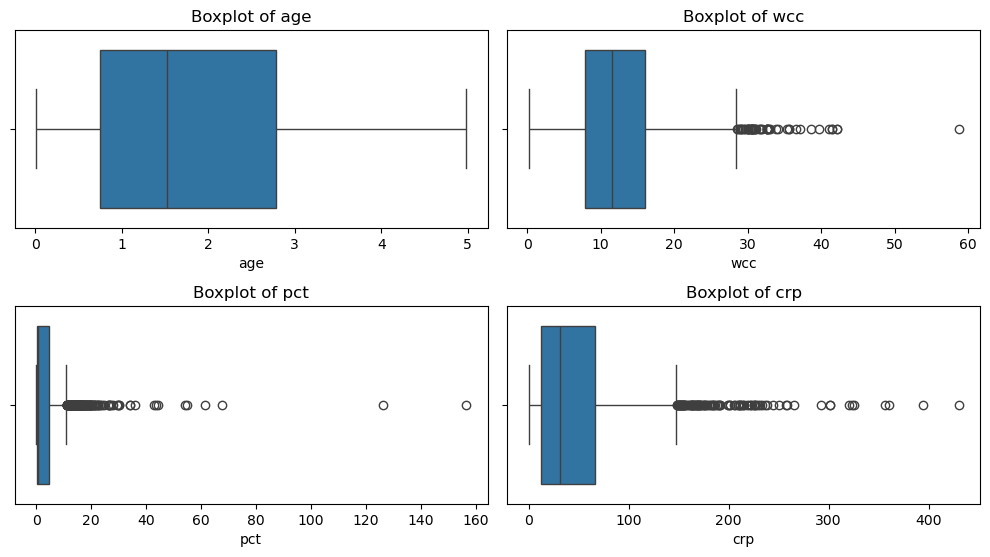

In [29]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(col):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=sample_df, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

## Methods for removing outliers

In [39]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame
    for feature in columns:
        if feature in df_cleaned.columns:  # Check if the feature is in the DataFrame
            Q1 = df_cleaned[feature].quantile(0.25)
            Q3 = df_cleaned[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - (1.5 * IQR)
            upper_bound = Q3 + (1.5 * IQR)
            df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
        else:
            print(f"Warning: {feature} is not in the DataFrame columns.")
    return df_cleaned

In [40]:
need_to_remove_outliers = ['wcc', 'pct', 'crp']
IQR_method_df = remove_outliers(sample_df, need_to_remove_outliers)

In [41]:
IQR_method_df

,age,wcc,prevAB,sbi,pct,crp
0,1.19,16.5,0,1,2.000000,71.200000
1,1.49,9.4,0,1,0.735932,39.862150
2,3.70,19.9,0,1,0.120000,33.500000
3,1.41,5.9,0,1,4.573139,9.160000
4,2.61,11.8,0,1,0.070000,22.500000
...,...,...,...,...,...,...
1872,4.71,25.2,1,3,0.590000,46.600000
1873,4.74,11.6,1,1,0.370000,34.200000
1874,1.26,3.7,0,1,2.040000,41.700000
1875,3.90,12.2,0,1,2.150000,48.882555


### now let's check again outliers

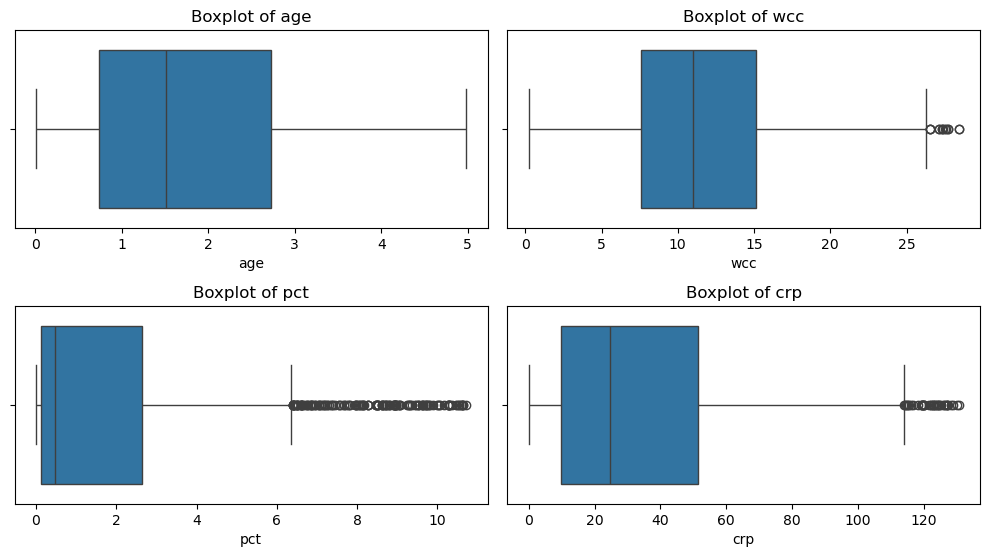

In [42]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(col):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=IQR_method_df, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

## Now focus on distribution


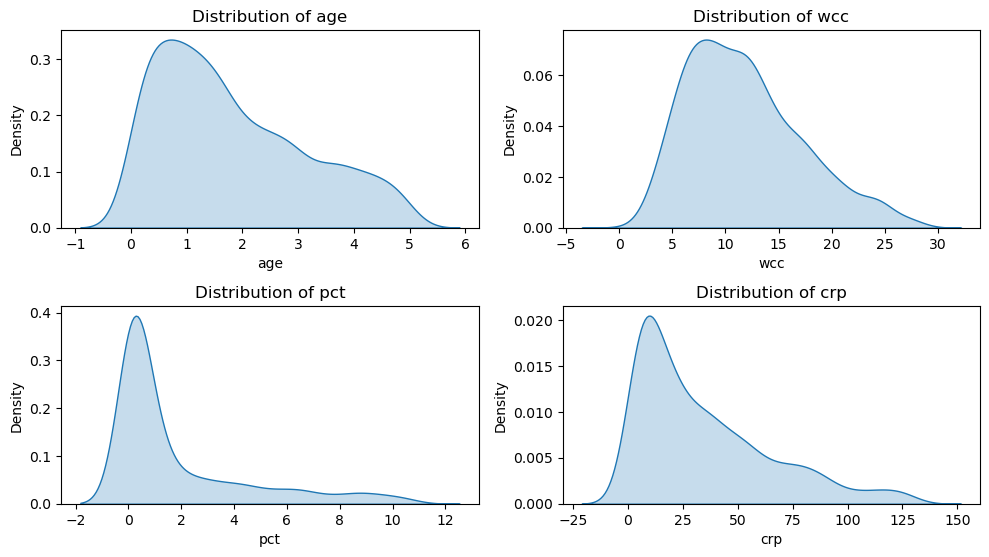

In [43]:
plt.figure(figsize=(10, 8))
col = ['age', 'wcc', 'pct', 'crp']
for i, feature in enumerate(col):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(IQR_method_df[feature], fill=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [52]:
def log_transformed(data, col):
    for i, feature in enumerate(col):
            data[f"log_{feature}"] = np.log1p(data[feature])  # Use log1p to handle zero values
    return data

In [53]:
normal_distribuion_IQR = log_transformed(IQR_method_df, col)

In [54]:
normal_distribuion_IQR

,age,wcc,prevAB,sbi,pct,crp,lof_age,lof_wcc,lof_pct,lof_crp,log_age,log_wcc,log_pct,log_crp
0,1.19,16.5,0,1,2.000000,71.200000,0.783902,2.862201,1.098612,4.279440,0.783902,2.862201,1.098612,4.279440
1,1.49,9.4,0,1,0.735932,39.862150,0.912283,2.341806,0.551545,3.710204,0.912283,2.341806,0.551545,3.710204
2,3.70,19.9,0,1,0.120000,33.500000,1.547563,3.039749,0.113329,3.540959,1.547563,3.039749,0.113329,3.540959
3,1.41,5.9,0,1,4.573139,9.160000,0.879627,1.931521,1.717958,2.318458,0.879627,1.931521,1.717958,2.318458
4,2.61,11.8,0,1,0.070000,22.500000,1.283708,2.549445,0.067659,3.157000,1.283708,2.549445,0.067659,3.157000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,4.71,25.2,1,3,0.590000,46.600000,1.742219,3.265759,0.463734,3.862833,1.742219,3.265759,0.463734,3.862833
1873,4.74,11.6,1,1,0.370000,34.200000,1.747459,2.533697,0.314811,3.561046,1.747459,2.533697,0.314811,3.561046
1874,1.26,3.7,0,1,2.040000,41.700000,0.815365,1.547563,1.111858,3.754199,0.815365,1.547563,1.111858,3.754199
1875,3.90,12.2,0,1,2.150000,48.882555,1.589235,2.580217,1.147402,3.909671,1.589235,2.580217,1.147402,3.909671


In [55]:
# now check again distribution whether they follow normal distribution or not

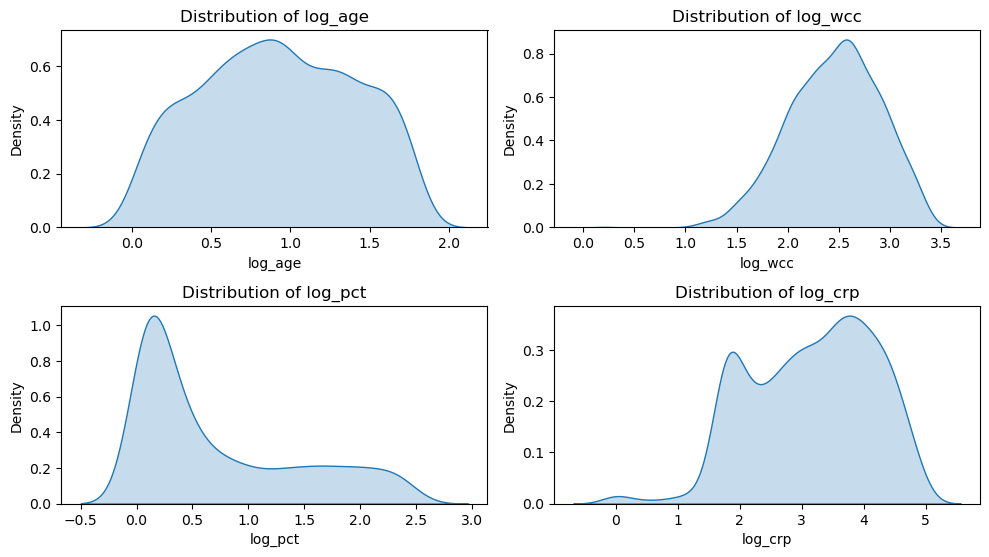

In [56]:
plt.figure(figsize=(10, 8))
col = ['log_age', 'log_wcc', 'log_pct', 'log_crp']
for i, feature in enumerate(col):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(normal_distribuion_IQR[feature], fill=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

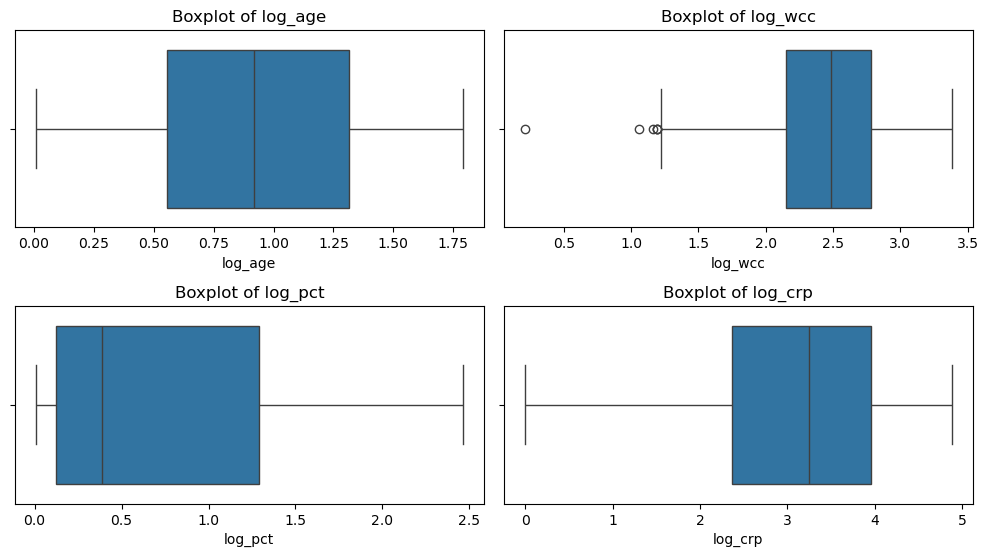

In [57]:
# Check BoxPlot on log tranformed
plt.figure(figsize=(10, 8))
for i, feature in enumerate(col):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=normal_distribuion_IQR, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [59]:
X = normal_distribuion_IQR.drop(['pct','crp', 'lof_age', 'lof_wcc',	'lof_pct', 'lof_crp', 'age', 'wcc', 'sbi'], axis=1)
X

,prevAB,log_age,log_wcc,log_pct,log_crp
0,0,0.783902,2.862201,1.098612,4.279440
1,0,0.912283,2.341806,0.551545,3.710204
2,0,1.547563,3.039749,0.113329,3.540959
3,0,0.879627,1.931521,1.717958,2.318458
4,0,1.283708,2.549445,0.067659,3.157000
...,...,...,...,...,...
1872,1,1.742219,3.265759,0.463734,3.862833
1873,1,1.747459,2.533697,0.314811,3.561046
1874,0,0.815365,1.547563,1.111858,3.754199
1875,0,1.589235,2.580217,1.147402,3.909671


In [60]:
y = normal_distribuion_IQR['sbi']

In [61]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1872    3
1873    1
1874    1
1875    1
1877    2
Name: sbi, Length: 1543, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Train the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='ovr')

In [66]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [67]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Perform Metrices

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7540453074433657
[[  0   1   0   0]
 [  0 233   0   0]
 [  0  35   0   0]
 [  0  40   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86       233
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        40

    accuracy                           0.75       309
   macro avg       0.19      0.25      0.21       309
weighted avg       0.57      0.75      0.65       309



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
# Accuracy has increased by 4 percent

# Now trying to scale our model

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
X_test

,prevAB,log_age,log_wcc,log_pct,log_crp
1818,0,0.530628,3.044522,0.086178,1.686399
1401,0,0.940007,2.501436,1.068153,3.238678
1523,1,0.336472,2.533697,1.310375,4.635311
674,1,1.011601,1.856298,0.148420,3.277145
1333,1,1.095273,2.001480,0.131028,1.902108
...,...,...,...,...,...
1607,0,0.157004,2.001480,1.700376,3.007088
912,1,1.456287,2.815409,2.281112,4.339361
1510,0,0.067659,2.079442,2.295700,3.040822
1321,0,0.576613,2.493205,1.441914,3.976499


In [93]:
X_test_scaled

array([[-0.81566975, -0.81043288,  1.35353885, -0.87785792, -1.47803205],
       [-0.81566975,  0.03945351,  0.12924674,  0.4560318 ,  0.08232594],
       [ 1.22598638, -1.21350814,  0.20197313,  0.7850593 ,  1.48622661],
       ...,
       [-0.81566975, -1.77157539, -0.82206478,  2.12349952, -0.11656008],
       [-0.81566975, -0.71496605,  0.11069254,  0.96373871,  0.82398633],
       [-0.81566975,  0.72985729,  0.96814483,  0.01290886,  0.71814031]])

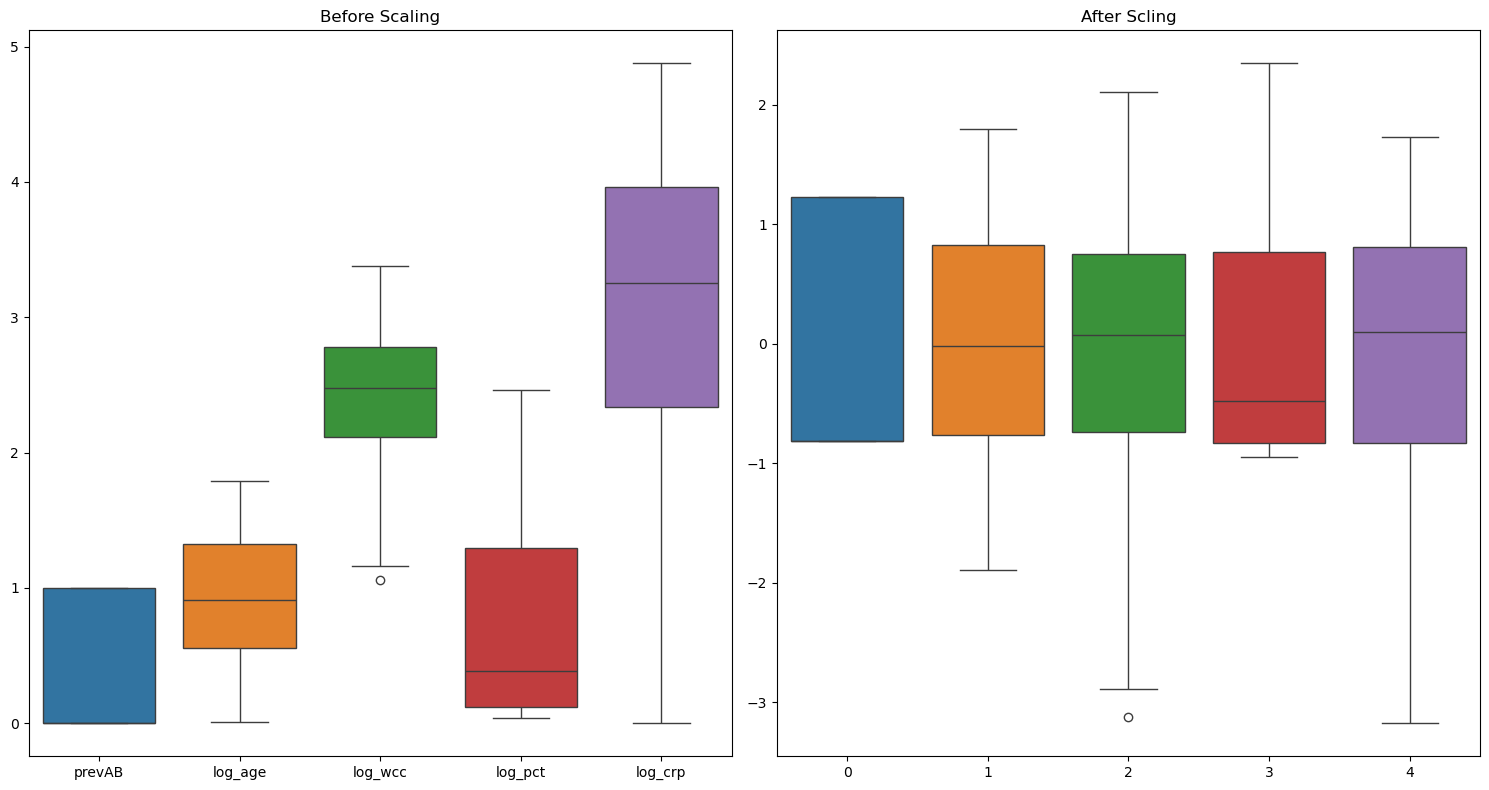

In [72]:
# Now check the effects of scling
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("After Scling")
plt.tight_layout()
plt.show()

## Now we can see out data has been scaled in the same units

In [73]:
model_scaled = LogisticRegression(multi_class='ovr')
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr')

In [75]:
scaled_pred = model_scaled.predict(X_test_scaled)

# Performance Evaluation using metrics

In [76]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, scaled_pred))
print(confusion_matrix(y_test, scaled_pred))
print(classification_report(y_test, scaled_pred))

0.7540453074433657
[[  0   1   0   0]
 [  0 233   0   0]
 [  0  35   0   0]
 [  0  40   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86       233
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        40

    accuracy                           0.75       309
   macro avg       0.19      0.25      0.21       309
weighted avg       0.57      0.75      0.65       309



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Let's try to do hyperparameter tuning

In [77]:
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
multi_class = ['ovr', 'multinomial']
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [78]:
param = dict(penalty=penalty, C=c_values, solver=solver, multi_class=multi_class)

In [79]:
## Grid SearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold(5)
grid = GridSearchCV(estimator=model, param_grid=param, scoring='accuracy', cv=cv, n_jobs=-1)

In [80]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(multi_class='ovr'), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [81]:
grid.fit(X_train_scaled, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
575 fits failed out of a total of 900.
The score on these train-test partiti

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(multi_class='ovr'), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [82]:
# Check best parameter selected
grid.best_params_

{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

In [83]:
# Check Score
grid.best_score_

0.7698561601000626

In [86]:
grid_pred = grid.predict(X_test_scaled)

In [87]:
grid_score = accuracy_score(grid_pred, y_test)
print(grid_score)
print(confusion_matrix(grid_pred, y_test))
print(classification_report(grid_pred, y_test))

0.7540453074433657
[[  0   0   0   0]
 [  1 233  35  40]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86       309
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.75       309
   macro avg       0.25      0.19      0.21       309
weighted avg       1.00      0.75      0.86       309



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# make prediction on unseen data

In [92]:
unseen_data = [[1.91,25.3, 1,4.400000,150.400000]]
unseen_data = scaler.transform(unseen_data)
unseen_data

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[  3.08389345,  50.6117265 ,  -3.25547418,   4.98192564,
        148.00951502]])

In [95]:
test_data = test_df.copy()
test_data

,age,wcc,prevAB,sbi,pct,crp
0,1.91,25.3,1,3,4.400000,150.400000
1,0.11,15.6,0,3,0.936872,31.394860
2,0.63,22.8,0,3,1.450000,260.300000
3,1.54,15.7,1,3,1.580699,89.657349
4,0.35,7.7,1,3,1.584856,145.039406
...,...,...,...,...,...,...
465,0.25,24.7,0,1,10.291240,24.100000
466,1.92,15.9,1,1,0.060000,11.300000
467,0.48,4.8,1,1,4.399836,18.878015
468,1.70,16.0,0,1,3.790000,27.600000


In [100]:
def log_transformed(data, col):
    for i, feature in enumerate(col):
            data[f"log_{feature}"] = np.log1p(data[feature])  # Use log1p to handle zero values
    return data

In [102]:
col = ['age', 'wcc', 'pct', 'crp']
test_data = log_transformed(test_data, col)

In [103]:
test_data

,age,wcc,prevAB,pct,crp,log_age,log_wcc,log_pct,log_crp
0,1.91,25.3,1,4.400000,150.400000,1.068153,3.269569,1.686399,5.019925
1,0.11,15.6,0,0.936872,31.394860,0.104360,2.809403,0.661074,3.478000
2,0.63,22.8,0,1.450000,260.300000,0.488580,3.169686,0.896088,5.565669
3,1.54,15.7,1,1.580699,89.657349,0.932164,2.815409,0.948060,4.507087
4,0.35,7.7,1,1.584856,145.039406,0.300105,2.163323,0.949670,4.983876
...,...,...,...,...,...,...,...,...,...
465,0.25,24.7,0,10.291240,24.100000,0.223144,3.246491,2.424027,3.222868
466,1.92,15.9,1,0.060000,11.300000,1.071584,2.827314,0.058269,2.509599
467,0.48,4.8,1,4.399836,18.878015,0.392042,1.757858,1.686369,2.989614
468,1.70,16.0,0,3.790000,27.600000,0.993252,2.833213,1.566530,3.353407


In [104]:
test_data.drop(['age', 'wcc', 'pct', 'crp'], axis=1, inplace=True)

In [105]:
test_data

,prevAB,log_age,log_wcc,log_pct,log_crp
0,1,1.068153,3.269569,1.686399,5.019925
1,0,0.104360,2.809403,0.661074,3.478000
2,0,0.488580,3.169686,0.896088,5.565669
3,1,0.932164,2.815409,0.948060,4.507087
4,1,0.300105,2.163323,0.949670,4.983876
...,...,...,...,...,...
465,0,0.223144,3.246491,2.424027,3.222868
466,1,1.071584,2.827314,0.058269,2.509599
467,1,0.392042,1.757858,1.686369,2.989614
468,0,0.993252,2.833213,1.566530,3.353407


In [106]:
test_data_scaled = scaler.transform(test_data)

In [107]:
test_data_scaled

array([[ 1.22598638,  0.30548914,  1.86086625,  1.29584084,  1.87284292],
       [-0.81566975, -1.69538196,  0.82350311, -0.09693346,  0.32289274],
       [-0.81566975, -0.89772661,  1.63569695,  0.22230312,  2.42142695],
       ...,
       [ 1.22598638, -1.09814303, -1.54701799,  1.29579953, -0.16803439],
       [-0.81566975,  0.14999123,  0.87718   ,  1.13301455,  0.19765128],
       [-0.81566975,  1.23798222,  0.43948971, -0.35114668, -0.20390724]])

In [108]:
test_data_scaled = grid.predict(test_data_scaled)

In [109]:
test_df['sbi_predicted'] = test_data_scaled

In [112]:
test_df['sbi_predicted'].unique()

array([1])

In [114]:
grid.predict([[0.25 ,	24.7 	,0,	10.291240 ,24.100000]])

array([2])

In [115]:
new_test_data = test_df.copy()

In [116]:
new_test_data

,age,wcc,prevAB,sbi,pct,crp,sbi_predicted
0,1.91,25.3,1,3,4.400000,150.400000,1
1,0.11,15.6,0,3,0.936872,31.394860,1
2,0.63,22.8,0,3,1.450000,260.300000,1
3,1.54,15.7,1,3,1.580699,89.657349,1
4,0.35,7.7,1,3,1.584856,145.039406,1
...,...,...,...,...,...,...,...
465,0.25,24.7,0,1,10.291240,24.100000,1
466,1.92,15.9,1,1,0.060000,11.300000,1
467,0.48,4.8,1,1,4.399836,18.878015,1
468,1.70,16.0,0,1,3.790000,27.600000,1


In [121]:
new_test_data.rename(columns={'age': 'log_age', 'wcc': 'log_wcc', 'pct': 'log_pct', 'crp': 'log_crp'}, inplace=True)

In [122]:
new_test_data

,log_age,log_wcc,prevAB,sbi,log_pct,log_crp,sbi_predicted
0,1.91,25.3,1,3,4.400000,150.400000,1
1,0.11,15.6,0,3,0.936872,31.394860,1
2,0.63,22.8,0,3,1.450000,260.300000,1
3,1.54,15.7,1,3,1.580699,89.657349,1
4,0.35,7.7,1,3,1.584856,145.039406,1
...,...,...,...,...,...,...,...
465,0.25,24.7,0,1,10.291240,24.100000,1
466,1.92,15.9,1,1,0.060000,11.300000,1
467,0.48,4.8,1,1,4.399836,18.878015,1
468,1.70,16.0,0,1,3.790000,27.600000,1


In [123]:
new_test_data.drop(['sbi','sbi_predicted'], axis=1, inplace=True)

In [124]:
new_test_data

,log_age,log_wcc,prevAB,log_pct,log_crp
0,1.91,25.3,1,4.400000,150.400000
1,0.11,15.6,0,0.936872,31.394860
2,0.63,22.8,0,1.450000,260.300000
3,1.54,15.7,1,1.580699,89.657349
4,0.35,7.7,1,1.584856,145.039406
...,...,...,...,...,...
465,0.25,24.7,0,10.291240,24.100000
466,1.92,15.9,1,0.060000,11.300000
467,0.48,4.8,1,4.399836,18.878015
468,1.70,16.0,0,3.790000,27.600000


In [126]:
without_scaled = grid.predict(new_test_data)

/usr/lib/python3/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
